In [ ]:
from TNT_Api import TNT_Api
UN = TNT_Api(tag='聯合國',nlimit=10000)

In [ ]:
UN.get_data()

1377 documents found in tag 聯合國
downloading, 10000 to go
0 data downloaded
error: <class 'KeyboardInterrupt'>
100 data downloaded
error: <class 'KeyboardInterrupt'>
error: <class 'KeyboardInterrupt'>


In [ ]:
## Simple Cleaning and Spelling Correction
ocr = UN.ocr.copy().reset_index()
def replace_line_change(t):
    if len(t)>0: return t[0].replace('\n',' ')
    else: return None
ocr['ocr_text'] = ocr.ocr.map(replace_line_change,na_action='ignore')

In [ ]:
## Remove non-English
from langdetect import detect, DetectorFactory
from langdetect import detect_langs
DetectorFactory.seed =0 
def remove_non_eng(text):
    if detect(text)=='en':return text
    else: return None
ocr['ocr_eng'] = ocr.ocr_text.map(remove_non_eng,na_action='ignore')

In [ ]:
ocr = ocr.dropna(axis=0,how='any')

In [ ]:
ocr.to_csv('data/UN_raw.csv')

### Checkpoint

In [1]:
import enchant
import spelling_correction as sc
import numpy as np
import pandas as pd
ocr = pd.read_csv('data/UN_raw.csv')
chkr = enchant.Dict('en_US')

In [2]:
import numpy as np
test = ocr.ocr_eng.copy()
def check_mis_spell(text):
    mis_rate = np.sum([chkr.check(w) for w in sc.words(text)])/len(sc.words(text))
    return mis_rate
mis_rate = test.map(check_mis_spell,na_action='ignore')

In [3]:
mis_rate.describe()

count    1284.000000
mean        0.745149
std         0.129976
min         0.142857
25%         0.648372
50%         0.763583
75%         0.849270
max         1.000000
Name: ocr_eng, dtype: float64

In [4]:
text_length = test.map(len,na_action='ignore')
total_words = text_length.sum()
print ('There are total {:d} documents and {:d} words'.format(len(text_length),text_length.sum()))

There are total 1284 documents and 2199153 words


In [97]:
import time
def auto_correct(text):
    wordlist = []
    correct_dic = {}
    for w in sc.words(text):
        if chkr.check(w): wordlist.append(w)
        else: 
            c = sc.correction(w)
            wordlist.append(c)
            correct_dic[w]=c
    return wordlist,correct_dic
start = time.time()
subset = test.iloc[:20].map(auto_correct,na_action='ignore')
end = time.time()-start
print (end)

53.05303406715393


### Check Point

In [100]:
subset[0][1]

{'0ive': '0ive',
 '1mnizntions': '1mnizntions',
 '40better': '40better',
 'aartoda': 'aartoda',
 'activitis': 'activities',
 'agn': 'an',
 'aidwifery': 'aidwifery',
 'allovlate': 'alleviate',
 'alnts': 'ants',
 'ander': 'under',
 'ao': 'to',
 'arette': 'pretty',
 'arrengesent': 'arrangement',
 'aselet': 'asleep',
 'aso': 'as',
 'aste': 'haste',
 'atinulate': 'stimulate',
 'atiulating': 'stimulating',
 'attendente': 'attendance',
 'aursos': 'across',
 'aurvey': 'survey',
 'aust': 'must',
 'basie': 'base',
 'becoso': 'become',
 'bedeide': 'bedside',
 'bedsoree': 'bedsoree',
 'ber': 'be',
 'bethine': 'bethink',
 'bo': 'to',
 'bospi': 'bosom',
 'botter': 'better',
 'bre': 'be',
 'bsir': 'sir',
 'cardboerd': 'cardboard',
 'ceatre': 'centre',
 'cen': 'men',
 'cere': 'were',
 'cnrra': 'carry',
 'contaat': 'contact',
 'contaet': 'contact',
 'couisunicable': 'couisunicable',
 'deonstration': 'demonstration',
 'dharge': 'charge',
 'direetortbrina2d4ngeabahodnoatiog': 'direetortbrina2d4ngeabahodn

In [82]:
uncorrected = pd.read_csv('data/UN_raw.csv',usecols=['ocr_eng'])
corrected = pd.read_csv('data/UN_full_text.csv')
uncorrected_words = uncorrected.ocr_eng.map(sc.words,na_action='ignore').sum()
corrected_words = corrected.ocr_eng.map(sc.words,na_action='ignore').sum()

In [91]:
from collections import Counter
from nltk.corpus import stopwords
filtered_words1 = [word for word in uncorrected_words if word not in stopwords.words('english')]

In [86]:
filtered_words2 = [word for word in corrected_words if word not in stopwords.words('english')]

([<matplotlib.axis.XTick at 0x11ca1c128>,
 <a list of 20 Text xticklabel objects>)

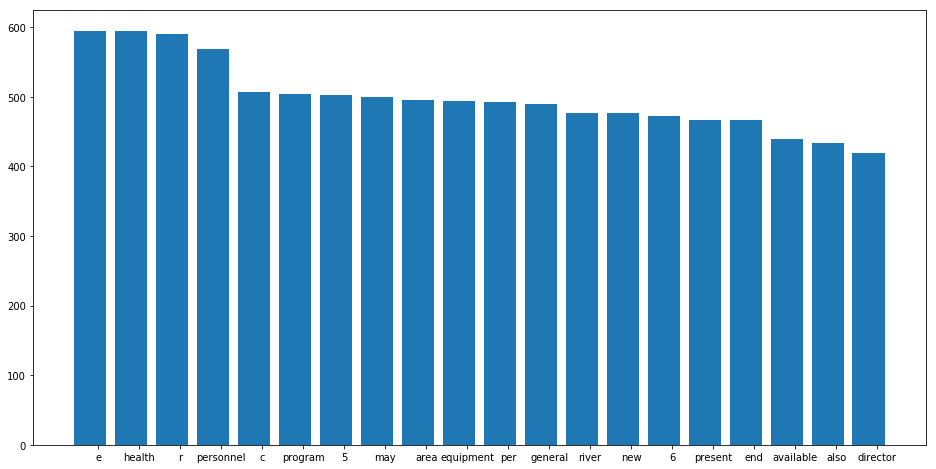

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
counts1 = Counter(filtered_words1)
labels1, values1 = zip(*counts.items())
indSort1 = np.argsort(values1)[-20:-40:-1]
labels1 = np.array(labels1)[indSort1]
values1 = np.array(values1)[indSort1]
indexes1 = np.arange(len(labels1))


bar_width = 0.2
plt.figure(figsize=(16,8))
plt.bar(indexes1, values1)
plt.xticks(indexes1 + bar_width, labels1)

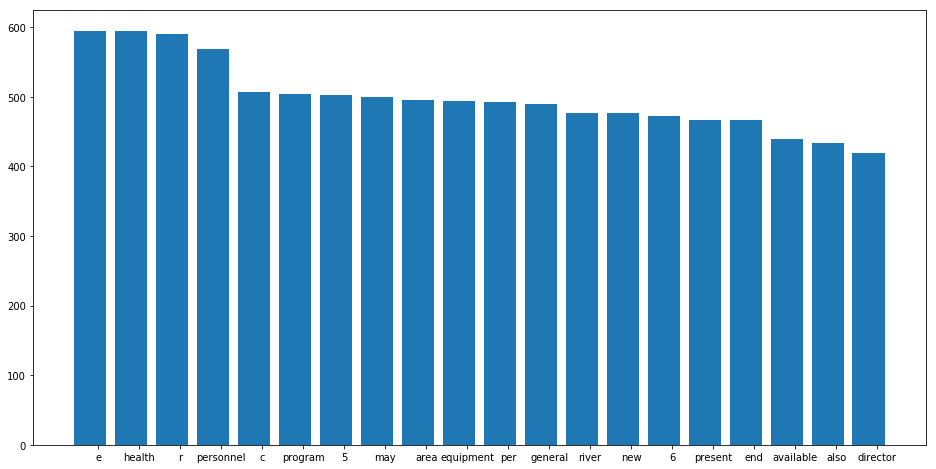

In [101]:
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
counts = Counter(filtered_words2)
labels, values = zip(*counts.items())
indSort = np.argsort(values)[-20:-40:-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.2
fig = plt.figure(figsize=(16,8))
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels)
plt.show()